In [93]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("Global Temperature.csv")
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.replace('NaN', pd.NA)
nan_counts = df.isna().sum()
print(nan_counts)

Year                       0
 Month                     0
Monthly Anomaly            0
 Monthly Unc.             13
  Annual Anomaly          11
 Annual Unc               24
Five-Year Anomaly         59
 Five-Year Unc.           72
 Ten-Year Anomaly        119
 Ten-Year Unc.           132
  Twenty-Year Anomaly    239
 Twenty-year Unc.        252
dtype: int64


In [95]:
df = df.dropna()
df.head()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
119,1859,12,-0.146,0.668,-0.248,0.144,-0.316,0.122,-0.283,0.126,-0.22,0.111
120,1860,1,-0.407,0.551,-0.251,0.152,-0.317,0.122,-0.279,0.128,-0.219,0.112
121,1860,2,-0.311,0.263,-0.263,0.153,-0.313,0.118,-0.279,0.127,-0.219,0.11
122,1860,3,-0.782,0.414,-0.258,0.148,-0.309,0.116,-0.28,0.127,-0.218,0.108
123,1860,4,0.262,0.396,-0.232,0.131,-0.313,0.116,-0.282,0.128,-0.216,0.107


In [96]:
df_sea_micro = pd.read_csv("SEA_MICRO.csv")
df_sea_micro.head()

,Date,Latitude,Longitude,Pieces_KM2
0,1986-10-15,40.62,-70.07,0
1,1986-10-16,39.67,-69.43,0
2,1986-10-18,36.45,-64.88,3597
3,1986-10-19,35.48,-63.70,3597
4,1986-10-21,30.97,-60.68,17989


In [97]:
df_sea_micro['Date'] = pd.to_datetime(df_sea_micro['Date'])
df_sea_micro['Year'] = df_sea_micro['Date'].dt.year
df_sea_micro['Month'] = df_sea_micro['Date'].dt.month

df.rename(columns={' Month' : 'Month'}, inplace=True)

merged_df = pd.merge(df, df_sea_micro, on=['Year', 'Month'], how='inner')
merged_df.head()

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.,Date,Latitude,Longitude,Pieces_KM2
0,1986,10,0.119,0.035,0.192,0.026,0.252,0.019,0.297,0.017,0.295,0.016,1986-10-15,40.62,-70.07,0
1,1986,10,0.119,0.035,0.192,0.026,0.252,0.019,0.297,0.017,0.295,0.016,1986-10-16,39.67,-69.43,0
2,1986,10,0.119,0.035,0.192,0.026,0.252,0.019,0.297,0.017,0.295,0.016,1986-10-18,36.45,-64.88,3597
3,1986,10,0.119,0.035,0.192,0.026,0.252,0.019,0.297,0.017,0.295,0.016,1986-10-19,35.48,-63.70,3597
4,1986,10,0.119,0.035,0.192,0.026,0.252,0.019,0.297,0.017,0.295,0.016,1986-10-21,30.97,-60.68,17989


<AxesSubplot:>

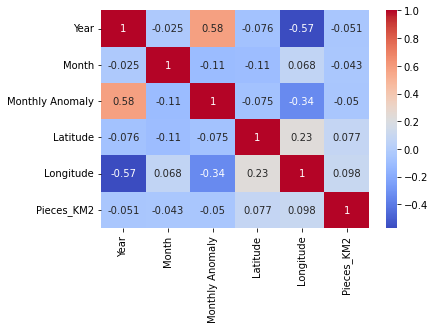

In [98]:
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [99]:
pearson_corr, pearson_p_value = pearsonr(merged_df['Monthly Anomaly'], merged_df['Pieces_KM2'])
spearman_corr, spearman_p_value = spearmanr(merged_df['Monthly Anomaly'], merged_df['Pieces_KM2'])
print("Pearson p-value: ", pearson_p_value)
print("Spearman p-value: ", spearman_p_value)

Pearson p-value:  1.4401491220068904e-05
Spearman p-value:  2.4541256666883545e-62


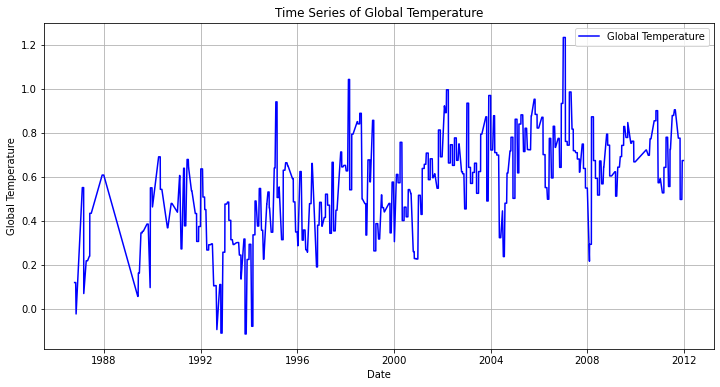

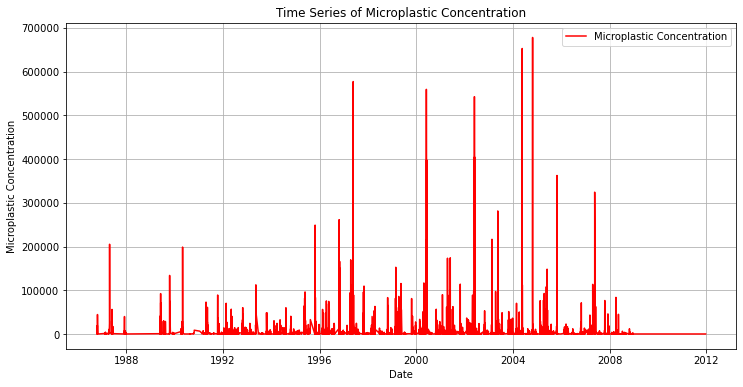

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Monthly Anomaly'], label='Global Temperature', color='blue')
plt.xlabel('Date')
plt.ylabel('Global Temperature')
plt.title('Time Series of Global Temperature')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Pieces_KM2'], label='Microplastic Concentration', color='red')
plt.xlabel('Date')
plt.ylabel('Microplastic Concentration')
plt.title('Time Series of Microplastic Concentration')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
df_geomarine_micro = pd.read_csv("GEOMARINE_MICRO.csv")
df_geomarine_micro.head()

,Date,Latitude,Longitude,MP_conc__particles_cubic_metre_,Normalized
0,2017-10-01,38.335844,-9.250058,180,0.515759
1,2017-10-01,36.796376,-7.944142,307,0.879656
2,2017-10-01,36.707197,-2.737703,280,0.802292
3,2017-10-23,36.116504,-4.254036,212,0.607450
4,2017-10-25,35.392750,-12.180278,63,0.180516
